# **"HOP Total Roman Domination Using the Differential Evolution Algorithm"**

# Importing Required **Libraries**

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt


# **Function to Get Two-Hop Neighbors**

In [12]:
# Define function to get two-hop neighbors
def two_hop_neighbors(graph, vertex):
    """ Returns a set of vertices within two hops of the given vertex. """
    neighbors = set(graph.get(vertex, []))
    for neighbor in graph.get(vertex, []):
        neighbors.update(graph.get(neighbor, []))
    neighbors.discard(vertex)
    return neighbors

# Function to Validate **HTRDF**

In [13]:
# Define function to check validity of the hop total Roman dominating function
def is_valid_htrdf(graph, labels):
    """ Checks if the given labels form a valid hop total Roman dominating function. """
    for vertex, label in labels.items():
        if label == 0:
            if not any(labels.get(neighbor) == 2 for neighbor in two_hop_neighbors(graph, vertex)):
                return False
        if label == 1:
            if not any(labels.get(neighbor) == 2 for neighbor in graph.get(vertex, [])):
                return False
    return True

# **Function to Compute Label Weight**

In [14]:
# Define function to calculate the weight of the labeling
def weight(labels):
    """ Returns the weight of the labeling. """
    return sum(labels.values())

# **Function to Generate a Random Labeling**

In [15]:
# Define function to generate random solutions
def generate_random_solution(vertices):
    """ Generates a random labeling for the vertices. """
    return {vertex: random.choice([0, 1, 2]) for vertex in vertices}

# **Heuristic Approach to Generate a Valid HTRDF**

In [16]:
# Define heuristic approach for the hop total Roman dominating function
def heuristic_htrdf(graph):
    """ Generates a heuristic solution for the hop total Roman dominating function. """
    vertices = list(graph.keys())
    labels = {vertex: 0 for vertex in vertices}

    # Ensure heuristic conditions
    for vertex in vertices:
        if labels[vertex] == 0 and not any(labels.get(neighbor) == 2 for neighbor in two_hop_neighbors(graph, vertex)):
            labels[vertex] = 2

    for vertex in vertices:
        if labels[vertex] == 1 and not any(labels.get(neighbor) == 2 for neighbor in graph.get(vertex, [])):
            labels[vertex] = 2

    return labels

# **Differential Evolution (DE) Algorithm**

In [19]:
# Define Differential Evolution algorithm
def de_algorithm(graph, num_individuals=50, max_generations=100, mutation_factor=0.8, crossover_prob=0.9):
    vertices = list(graph.keys())
    population = [generate_random_solution(vertices) for _ in range(num_individuals)]
    fitness = [weight(sol) if is_valid_htrdf(graph, sol) else float('inf') for sol in population]

    for generation in range(max_generations):
        new_population = []

        for i in range(num_individuals):
            # Select three random individuals
            candidates = list(range(num_individuals))
            candidates.remove(i)
            a, b, c = random.sample(candidates, 3)

            # Mutation
            mutant = {}
            for vertex in vertices:
                if random.random() < mutation_factor:
                    mutant[vertex] = population[a][vertex]
                else:
                    mutant[vertex] = population[i][vertex]

            # Crossover
            trial = {}
            for vertex in vertices:
                if random.random() < crossover_prob:
                    trial[vertex] = mutant[vertex]
                else:
                    trial[vertex] = population[i][vertex]

            # Ensure the trial solution is valid
            if not is_valid_htrdf(graph, trial):
                trial = generate_random_solution(vertices)

            # Selection
            trial_fitness = weight(trial)
            if trial_fitness < fitness[i]:
                new_population.append(trial)
                fitness[i] = trial_fitness
            else:
                new_population.append(population[i])

        population = new_population
        fitness = [weight(sol) if is_valid_htrdf(graph, sol) else float('inf') for sol in population]

    best_solution_index = fitness.index(min(fitness))
    return population[best_solution_index], fitness[best_solution_index]

# **Function to Visualize the Graph**

Best labels: {'A': 0, 'B': 0, 'C': 2, 'D': 0, 'E': 0, 'F': 2}
Minimum weight: 4
Is best solution valid? True


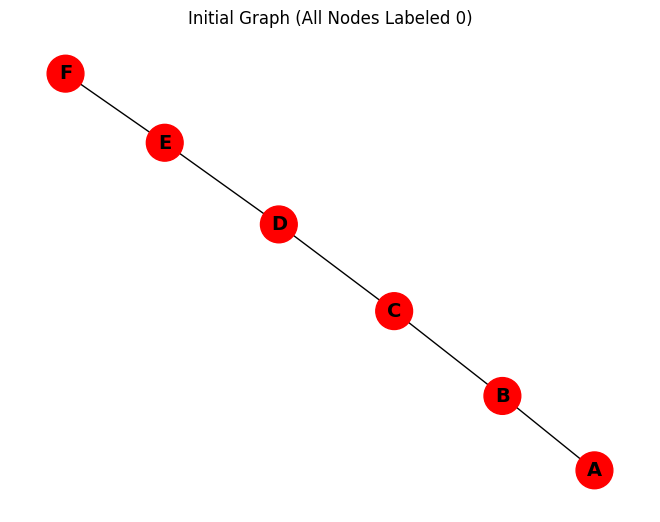

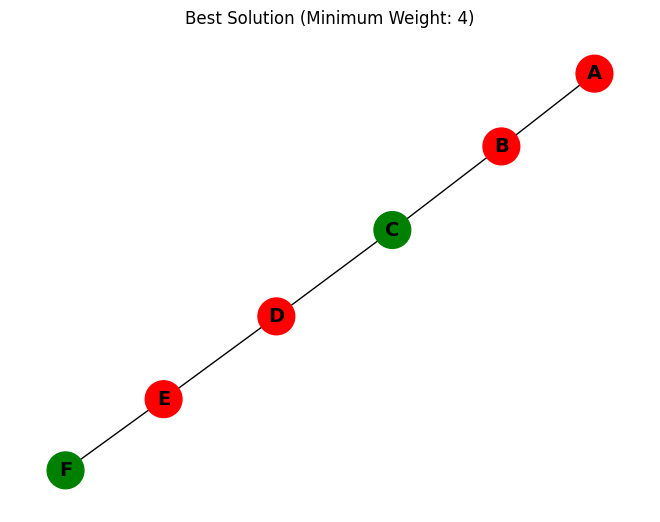

In [20]:

# Define function to visualize the graph
def visualize_graph(graph, labels, title):
    """ Visualizes the graph with node colors based on labels. """
    G = nx.Graph(graph)
    color_map = {0: 'red', 1: 'yellow', 2: 'green'}
    node_colors = [color_map.get(labels.get(node, 0), 'red') for node in G.nodes()]

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=14, font_color='black', font_weight='bold')
    plt.title(title)
    plt.show()

# Define the graph as an adjacency list
graph = {
    'A': ['B'],
    'B': ['C'],
    'C': ['D'],
    'D': ['E'],
    'E': ['F'],
    'F': []
}

# Find and print the minimum hop total Roman dominating function using the DE algorithm
best_labels, min_weight = de_algorithm(graph)
print("Best labels:", best_labels)
print("Minimum weight:", min_weight)

# Verify if the best labels are valid
print("Is best solution valid?", is_valid_htrdf(graph, best_labels))

# Visualize the initial graph
visualize_graph(graph, {node: 0 for node in graph}, "Initial Graph (All Nodes Labeled 0)")

# Visualize the graph with the best labels found
visualize_graph(graph, best_labels, f"Best Solution (Minimum Weight: {min_weight})")


In [21]:
#                                    ******THANK YOU******